In [13]:
import pandas as pd # import pandas as alias pd

In [14]:
df = pd.read_csv("ensurance.csv") # .red_csv ktqra files mais khass darori ykono f directory je pense la mkanx khass dir path.join()

In [15]:
print("shape:", df.shape) # shape kt3tik xhal mn rowe and column kynin
df.head() #kt3tik l 5 rows lowlin mais ymkn lid t customizi bhal .head(10)

shape: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.471
4,32,male,28.880,0,no,northwest,3866.855


2_ types and summary

In [20]:
df.info() #Prints a summary of the DataFrame: number of entries , index range, column names, non-null count for each column, and each column’s dtype (int, float, object, etc.)
display(df.describe(include='all').T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338.000,NaN,NaN,NaN,39.207,14.050,18.000,27.000,39.000,51.000,64.000
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338.000,NaN,NaN,NaN,30.663,6.098,15.960,26.296,30.400,34.694,53.130
children,1338.000,NaN,NaN,NaN,1.095,1.205,0.000,0.000,1.000,2.000,5.000
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338.000,NaN,NaN,NaN,13270.422,12110.011,1121.874,4740.287,9382.033,16639.913,63770.428


TAche 2

In [18]:
# dimensions:
print("Shape:", df.shape)

#types and non null counts
df.info()




Shape: (1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


2 _ Effectuer une analyse descriptive des données (moyennes, médianes, écarts-types pour les variables numériques ; fréquences pour les catégoriques).

In [24]:
print(df.describe().T[['mean', '50%', 'std', 'min', 'max']])  # median is '50%' in output (lvaleur li jat lwst ) ; mean howa : The arithmetic average of all values (sum of values) / (number of values). ; standard knxofo bih xhal kola points b3ida 3la mean : Example: For [1, 2, 3, 4, 5], std ≈ 1.41.
# With .T, columns become rows and statistics become columns, making it easier to read if you have many columns.

# Frequencies for categorical columns
for col in df.select_dtypes(include=['object', 'category']):  #hna knho l frequense les categorie li maxi num f cnhsbo lcout xhal t3awdo
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts(dropna=False))

              mean      50%       std      min       max
age         39.207   39.000    14.050   18.000    64.000
bmi         30.663   30.400     6.098   15.960    53.130
children     1.095    1.000     1.205    0.000     5.000
charges  13270.422 9382.033 12110.011 1121.874 63770.428

Value counts for sex:
sex
male      676
female    662
Name: count, dtype: int64

Value counts for smoker:
smoker
no     1064
yes     274
Name: count, dtype: int64

Value counts for region:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


2 Identifier les valeurs manquantes et les doublons.

In [26]:
print("Missing values per column:")
print(df.isna())
# isna() give u th amplicaple valeurs and su count them
# Duplicate rows count
print("Number of duplicate rows:", df.duplicated().sum())

Missing values per column:
        age    sex    bmi  children  smoker  region  charges
0     False  False  False     False   False   False    False
1     False  False  False     False   False   False    False
2     False  False  False     False   False   False    False
3     False  False  False     False   False   False    False
4     False  False  False     False   False   False    False
...     ...    ...    ...       ...     ...     ...      ...
1333  False  False  False     False   False   False    False
1334  False  False  False     False   False   False    False
1335  False  False  False     False   False   False    False
1336  False  False  False     False   False   False    False
1337  False  False  False     False   False   False    False

[1338 rows x 7 columns]
Number of duplicate rows: 1


Analyser la distribution des variables numériques (ex. : histogrammes avec Matplotlib/Seaborn).

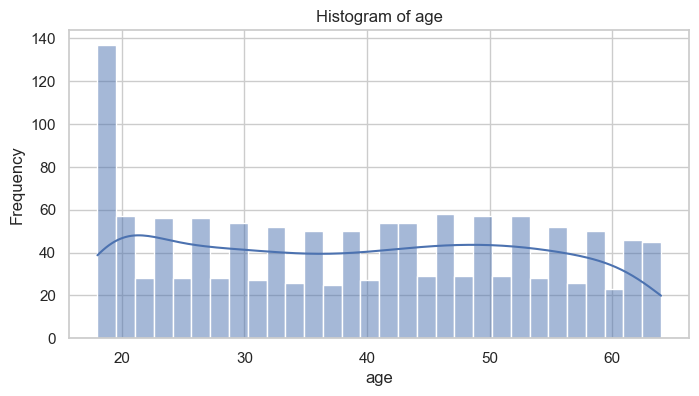

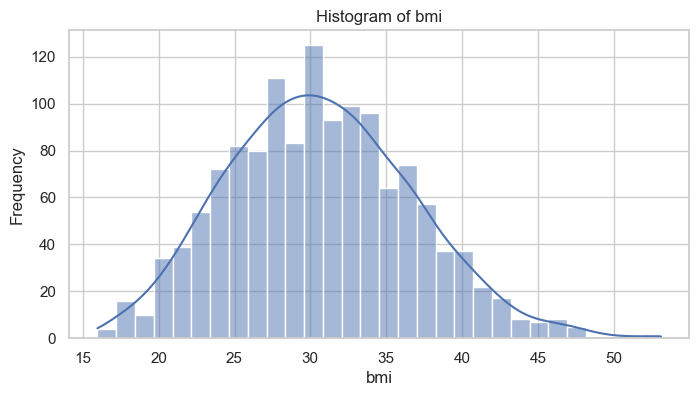

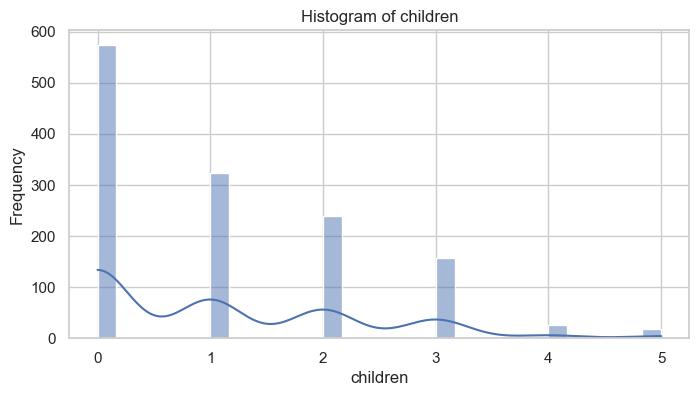

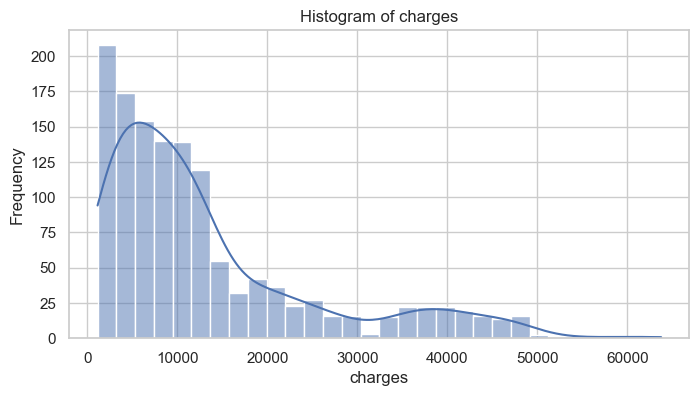

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Plot histograms for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


    #for the kde the curve we can conclude it as : “If I pick a random value from this column, how likely is it to be around X?”

Étudier les relations entre variables à l'aide de matrices de corrélation et de visualisations (pairplots ou heatmaps):

           age   bmi  children  charges
age      1.000 0.109     0.042    0.299
bmi      0.109 1.000     0.013    0.198
children 0.042 0.013     1.000    0.068
charges  0.299 0.198     0.068    1.000


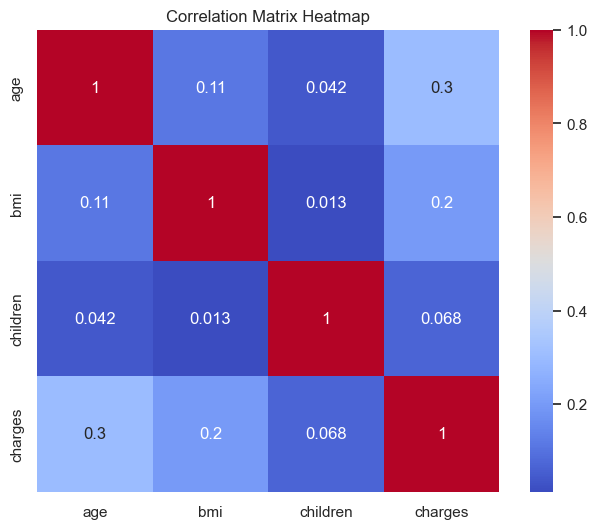

In [51]:
# Importing required libraries
import matplotlib.pyplot as plt   # Matplotlib is used for creating static, animated, and interactive visualizations
import seaborn as sns             # Seaborn builds on top of Matplotlib and provides high-level functions
                                  # for attractive and informative statistical graphics

# Select numeric columns from the DataFrame
# - df is assumed to be a pandas DataFrame containing your dataset.
# - select_dtypes(include=['number']) filters only the numeric columns
#   (e.g., integers, floats) since correlation makes sense only for numerical data.
# - .columns returns the list of column names that are numeric.
numeric_cols = df.select_dtypes(include=['number']).columns

# Compute the correlation matrix for the numeric columns
# - df[numeric_cols] creates a new DataFrame containing only numeric columns.
# - .corr() calculates the pairwise correlation between these numeric columns.
# - The result is a symmetric matrix where each cell (i, j)
#   represents the correlation coefficient between column i and column j.
# - Correlation values range from -1 to +1:
#     -1 = perfect negative correlation (when one increases, the other decreases),
#      0 = no correlation,
#     +1 = perfect positive correlation (both move together).
corr_matrix = df[numeric_cols].corr()

# Plotting the heatmap for correlation visualization
# - plt.figure(figsize=(8, 6)) sets the overall figure size (width=8, height=6 inches).
plt.figure(figsize=(8, 6))

# - sns.heatmap() is used to create a heatmap (colored grid) from the correlation matrix.
#   Arguments explained:
#   * corr_matrix → the data being visualized (our correlation matrix).
#   * annot=True → writes the correlation values inside the heatmap cells for readability.
#   * cmap='coolwarm' → sets the color palette ranging from cool (blue) to warm (red).
#       Blue tones indicate negative correlations, red tones indicate positive ones.
#   * square=True → makes each cell a square for a neat, proportional look.
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# - Adding a title to explain what the plot represents.
plt.title('Correlation Matrix Heatmap')

# - Finally, plt.show() displays the heatmap in an output window or notebook.
plt.show()


Tâche 3 : Prétraitement des données
Gestion des valeurs manquantes (ex. : imputation avec la médiane pour les numériques ou le mode pour les catégoriques).

In [ ]:
for col in df.select_dtypes(include=['number']).columns:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)


#for other categerys than num
for col in df.select_dtypes(include=['object', 'category']).columns:
    # - df.select_dtypes(include=['object', 'category']) selects string/object or category columns.
    # - For categorical variables (e.g., Gender, City, Product), the most frequent value (mode) is used.
    # - Reason: If 'Casablanca' is the most common city, filling missing values with it
    #   is safer than choosing randomly or dropping data.

    mode_value = df[col].mode(dropna=True)[0]  # Find the most frequent value (mode) , hna mode ktr3 ktr mn value la kno joj mtsawyin fl count so [0] ktjib lwl wknfiro wst mode()dropna=true hitax y9d ykon null aktar haja t3awdat

    # Replace missing values (NaN) with the mode
    df[col].fillna(mode_value, inplace=True)

    # Print for tracking
    print(f"Filled missing values in categorical column '{col}' with mode: {mode_value}")

Suppression des doublons.

In [ ]:
df.drop_duplicates(inplace=True) #deletes all duplicate rows in your DataFrame. inplace=True means the operation changes your original DataFrame directly.


3 Détection et gestion des valeurs aberrantes : Utiliser des techniques statistiques (ex. : boîte à moustaches avec Seaborn, z-score > 3, ou IQR pour identifier les outliers) et gérer les lignes contenant des valeurs aberrantes (suppression).

In [52]:
import numpy as np  # Import the numpy library for numerical operations

# Loop through each column in the list of numeric columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)        # Calculate the first quartile (25th percentile) of the column
    Q3 = df[col].quantile(0.75)        # Calculate the third quartile (75th percentile) of the column
    IQR = Q3 - Q1                      # Compute the interquartile range (IQR)
    lower_bound = Q1 - 1.5 * IQR        # Define the lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR        # Define the upper bound for outliers

    # Find and count the number of outliers in the column
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {outliers.shape[0]} outliers detected.")  # Display the number of outliers found

    # Remove rows where the column value is an outlier
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

age: 0 outliers detected.
bmi: 9 outliers detected.
children: 0 outliers detected.
charges: 138 outliers detected.


4_Encoder les variables catégoriques (sexe, smoker, région) avec one-hot encoding ou label encoding.

In [54]:
categorical_cols = ['sex', 'smoker', 'region']

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(df_encoded.head())

   age    bmi  children   charges  sex_male  smoker_yes  region_northwest  \
0   19 27.900         0 16884.924     False        True             False   
1   18 33.770         1  1725.552      True       False             False   
2   28 33.000         3  4449.462      True       False             False   
3   33 22.705         0 21984.471      True       False              True   
4   32 28.880         0  3866.855      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  
